In [27]:
import os
import glob
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.datasets import boston_housing #goi du lieu thu vien
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/Classification_Emotion')
!unzip Library.zip
!mkdir image
!mv Angry image
!mv Happy image
!mv Sad image
!mv Surprise image

Archive:  Library.zip
replace Library/Angry/angry0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
mkdir: cannot create directory ‘image’: File exists
mv: cannot stat 'Angry': No such file or directory
mv: cannot stat 'Happy': No such file or directory
mv: cannot stat 'Sad': No such file or directory
mv: cannot stat 'Surprise': No such file or directory


In [6]:
# load image
path_dir = os.path.join(os.getcwd(), 'Library')
path_dir = sorted(glob.glob(path_dir + '/*'))
Angry = glob.glob(path_dir[0] + '/*')
Happy = glob.glob(path_dir[1] + '/*')
Sad = glob.glob(path_dir[2] + '/*')
Suprise = glob.glob(path_dir[3] + '/*')

In [12]:
img_cnt = len(Angry) + len(Happy) + len(Sad) + len(Suprise)
print(img_cnt)
class_names = ['Angry', 'Happy', 'Sad', 'Surprise']
num_classes = len(class_names)
print(class_names)

81
['Angry', 'Happy', 'Sad', 'Surprise']


In [8]:
def load_image(path, img_size=(150, 150)):
    img = cv2.imread(path, 1)
    img = cv2.resize(img, img_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [9]:
def load_images(path_dir):
    images = []
    labels = []

    path_dir = sorted(glob.glob(path_dir + '/*'))
    print(path_dir)
    for paths in path_dir:
        paths = sorted(glob.glob(paths + '/*'))
        for path in paths:
            img = load_image(path)
            images.append(img)
            labels.append(class_names.index(os.path.basename(os.path.dirname(path))))
    return np.array(images), np.array(labels)

In [13]:
data_dir = os.path.join(os.getcwd(), 'Library')
dataset = load_images(data_dir)

['/content/gdrive/MyDrive/Colab Notebooks/Classification_Emotion/Library/Angry', '/content/gdrive/MyDrive/Colab Notebooks/Classification_Emotion/Library/Happy', '/content/gdrive/MyDrive/Colab Notebooks/Classification_Emotion/Library/Sad', '/content/gdrive/MyDrive/Colab Notebooks/Classification_Emotion/Library/Surprise']


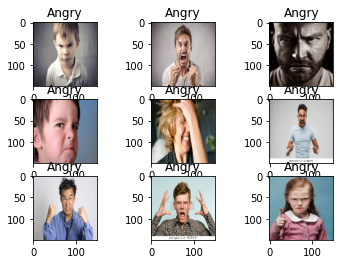

In [18]:
for i in range(9):
  # print(class_names[dataset[0][i]])
  plt.subplot(3, 3, i+1)
  plt.title(class_names[dataset[1][i]])
  plt.imshow(dataset[0][i])

In [19]:
print(dataset[0].shape)
print(dataset[1].shape)

(81, 150, 150, 3)
(81,)


In [20]:
train_images, test_images, train_labels, test_labels = train_test_split(dataset[0], dataset[1], test_size=0.2, random_state=42)
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(64, 150, 150, 3)
(17, 150, 150, 3)
(64,)
(17,)


In [21]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = keras.utils.np_utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.np_utils.to_categorical(test_labels, num_classes)
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(64, 150, 150, 3)
(17, 150, 150, 3)
(64, 4)
(17, 4)


In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, ZeroPadding2D
#Create Model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [32]:
#opt=SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=20,batch_size=64,validation_data=(test_images,test_labels),verbose=1)

Epoch 1/20
1/1 [==============================] - 10s 10s/step - loss: 1.3735 - accuracy: 0.2812 - val_loss: 3.8669 - val_accuracy: 0.3529
Epoch 2/20
1/1 [==============================] - 9s 9s/step - loss: 4.5879 - accuracy: 0.2188 - val_loss: 1.5052 - val_accuracy: 0.2353
Epoch 3/20
1/1 [==============================] - 9s 9s/step - loss: 1.6136 - accuracy: 0.2656 - val_loss: 1.5375 - val_accuracy: 0.1176
Epoch 4/20
1/1 [==============================] - 9s 9s/step - loss: 1.4680 - accuracy: 0.2812 - val_loss: 1.3899 - val_accuracy: 0.2353
Epoch 5/20
1/1 [==============================] - 9s 9s/step - loss: 1.4187 - accuracy: 0.2656 - val_loss: 1.4122 - val_accuracy: 0.1176
Epoch 6/20
1/1 [==============================] - 9s 9s/step - loss: 1.3785 - accuracy: 0.2812 - val_loss: 1.4120 - val_accuracy: 0.2353
Epoch 7/20
1/1 [==============================] - 9s 9s/step - loss: 1.3767 - accuracy: 0.3750 - val_loss: 1.4163 - val_accuracy: 0.2353
Epoch 8/20
1/1 [=======================

In [40]:
def plot_history(history_fine):
  f1 = history_fine.history['accuracy']
  val_f1 = history_fine.history['val_accuracy']
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

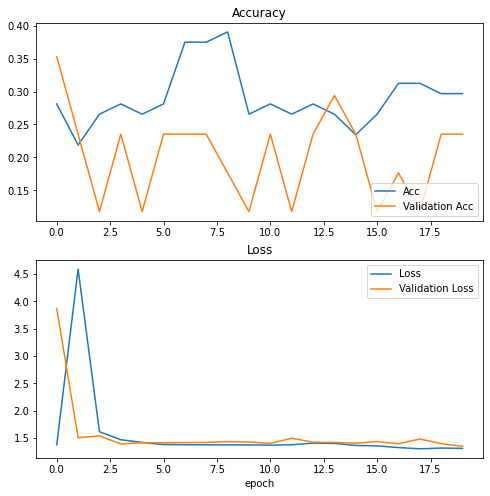

In [41]:
plot_history(history)

Text(0.5, 1.0, 'Predict: Angry')

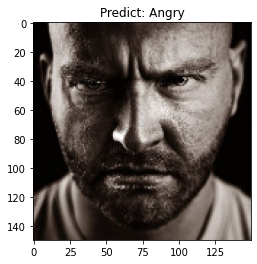

In [49]:
img_test = load_image('/content/gdrive/MyDrive/Colab Notebooks/Classification_Emotion/Library/Angry/angry10.jpg')
plt.imshow(img_test)
img_test = np.asarray(img_test)
img_test = img_test / 255
img_test = np.expand_dims(img_test, axis=0)

classe_num = np.argmax(model.predict(img_test))
plt.title("Predict: {}".format(class_names[classe_num]))

Text(0.5, 1.0, 'Predict: Surprise')

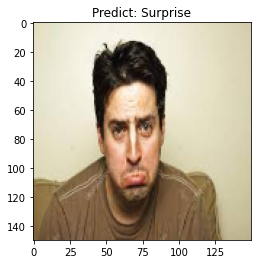

In [52]:
img_test = load_image('/content/gdrive/MyDrive/Colab Notebooks/Classification_Emotion/Library/Sad/1.jpg')
plt.imshow(img_test)
img_test = np.asarray(img_test)
img_test = img_test / 255
img_test = np.expand_dims(img_test, axis=0)

classe_num = np.argmax(model.predict(img_test))
plt.title("Predict: {}".format(class_names[classe_num]))

In [ ]:
img_test = load_image('/content/gdrive/MyDrive/Colab Notebooks/Classification_Emotion/Library/Suprise/10.jpg')
plt.imshow(img_test)
img_test = np.asarray(img_test)
img_test = img_test / 255
img_test = np.expand_dims(img_test, axis=0)

classe_num = np.argmax(model.predict(img_test))
plt.title("Predict: {}".format(class_names[classe_num]))

Text(0.5, 1.0, 'Predict: Surprise')

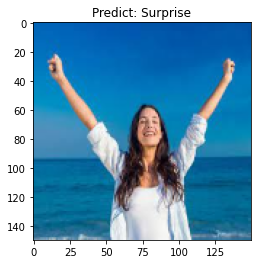

In [48]:
img_test = load_image('/content/gdrive/MyDrive/Colab Notebooks/Classification_Emotion/Library/Happy/9.jpg')
plt.imshow(img_test)
img_test = np.asarray(img_test)
img_test = img_test / 255
img_test = np.expand_dims(img_test, axis=0)

classe_num = np.argmax(model.predict(img_test))
plt.title("Predict: {}".format(class_names[classe_num]))